In [1]:
pip install nelson_siegel_svensson

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd
import numpy as np
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

#M1 L3

In [3]:
directory = r"C:\Users\kaleu\Desktop\WQU\raw data"
#Data Source: https://www.investing.com/rates-bonds/

dfs = {}

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, usecols=['Date','Price'])
        dfs[filename] = df['Price']
dfs = pd.DataFrame(dfs)

Date = pd.read_csv(file_path, usecols=['Date'])
dfs.columns = ['0.25','0.5','10','15','1','20','3','5','7']

dfs =dfs.set_index(pd.to_datetime(Date['Date']))

desired_order = ['0.5', '1', '3', '5', '7', '10', '15', '20']
dfs = dfs[desired_order]

In [4]:
t = np.array([0.5, 1, 3, 5, 7, 10, 15, 20])
y = np.array(dfs.loc["2025-09-23"]).flatten()

In [5]:
# Fit an NS model for yields from 2025-09-23
curve, status = calibrate_ns_ols(t, y, tau0=1)  # starting value of 1.0 for the optimization of tau
assert status.success
print(curve)

NelsonSiegelCurve(beta0=np.float64(3.7992774774975855), beta1=np.float64(-0.5993006870218842), beta2=np.float64(-3.4502480989060875), tau=np.float64(1.7229729997593308))


Text(0.5, 1.0, 'NS Model Result')

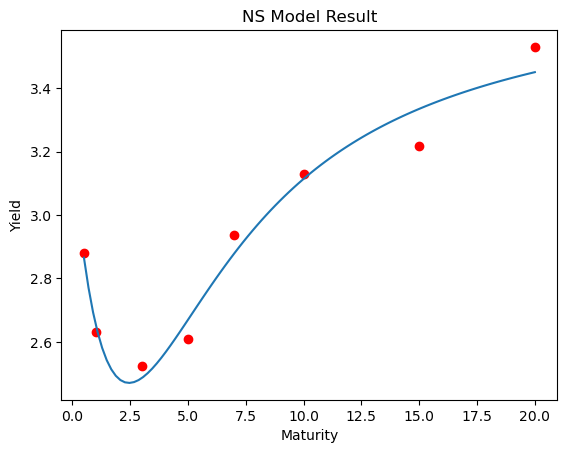

In [6]:
y_hat = curve
t_hat = np.linspace(0.5,20,100)
plt.plot(t_hat, y_hat(t_hat))
plt.scatter(t, y, color='red', label='Actual Data', marker='o')
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("NS Model Result")

In [7]:
# Using Scipy
cs = CubicSpline(t, y, bc_type='natural')

Text(0.5, 1.0, 'Cubic Spline Fit to Yield Data')

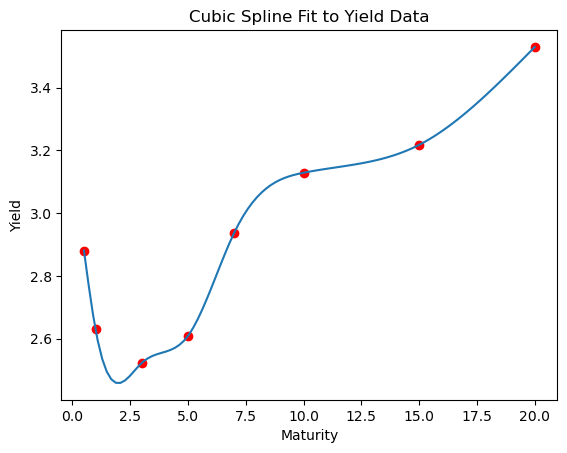

In [8]:
t_hat = np.linspace(0.5, 20, 100) 
y_spline = cs(t_hat)
plt.plot(t_hat, y_spline, label='Cubic Spline Fit')
plt.scatter(t, y, color='red', label='Actual Data', marker='o')
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Cubic Spline Fit to Yield Data")

Model Parameters:

In [9]:
breakpoints = cs.x 
coefficients = cs.c 
df = pd.DataFrame(
    np.round(coefficients,4),
    index=['Cubic(x^3)', 'Quadratic(x^2)', 'Linear(x^1)', 'Constant(x^0)'],
    columns=[f' ({breakpoints[i]} to {breakpoints[i+1]})' for i in range(len(breakpoints)-1)]
)
df

,(0.5 to 1.0),(1.0 to 3.0),(3.0 to 5.0),(5.0 to 7.0),(7.0 to 10.0),(10.0 to 15.0),(15.0 to 20.0)
Cubic(x^3),0.1938,-0.0574,0.0206,-0.0189,0.0045,0.0007,-0.0005
Quadratic(x^2),0.0000,0.2907,-0.0540,0.0699,-0.0434,-0.0028,0.0074
Linear(x^1),-0.5504,-0.4051,0.0683,0.1002,0.1532,0.0147,0.0378
Constant(x^0),2.8810,2.6300,2.5230,2.6090,2.9380,3.1290,3.2180
